In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import OrderedDict
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('crest')
pd.set_option('display.max_columns', None)

In [2]:
df_sep = pd.read_csv('/content/df_union sep.csv')
df = df_sep.drop(columns=['hash_sha256_num', 'id_fecha'])
display(df.head())

,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,Nivel del Sisbén,Grupo poblacional del afiliado,Cantidad de registros,Fecha de actualización
0,Femenino,1 a 5,EPS037,NUEVA EPS S.A.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,BETULIA,N,VÍCTIMAS DEL CONFLICTO ARMADO INTERNO,2,2025-09-06 22:28:56
1,Masculino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,HUILA,PITALITO,1,POBLACIÓN CON SISBEN,2,2025-09-06 22:28:56
2,Femenino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,BOYACA,SOGAMOSO,0,NaN,13,2025-09-06 22:28:56
3,Femenino,50 a 55,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CORDOBA,LA APARTADA,0,NaN,3,2025-09-06 22:28:56
4,Femenino,60 a 65,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CUNDINAMARCA,ARBELAEZ,1,POBLACIÓN CON SISBEN,1,2025-09-06 22:28:56


In [3]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

Dimensiones del dataset: (21278, 15)

Primeras filas:


,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,Nivel del Sisbén,Grupo poblacional del afiliado,Cantidad de registros,Fecha de actualización
0,Femenino,1 a 5,EPS037,NUEVA EPS S.A.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,BETULIA,N,VÍCTIMAS DEL CONFLICTO ARMADO INTERNO,2,2025-09-06 22:28:56
1,Masculino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,HUILA,PITALITO,1,POBLACIÓN CON SISBEN,2,2025-09-06 22:28:56
2,Femenino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,BOYACA,SOGAMOSO,0,NaN,13,2025-09-06 22:28:56
3,Femenino,50 a 55,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CORDOBA,LA APARTADA,0,NaN,3,2025-09-06 22:28:56
4,Femenino,60 a 65,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CUNDINAMARCA,ARBELAEZ,1,POBLACIÓN CON SISBEN,1,2025-09-06 22:28:56


In [4]:
# ============================================
# 2) Nombres de columnas y tipos
#    (puedes ajustar si tu archivo difiere)
# ============================================
# Intento robusto de encontrar columnas por nombre aproximado
def find_col(cands):
    cols_lower = {c.lower(): c for c in df.columns}
    for pat in cands:
        for cl in cols_lower:
            if pat in cl:
                return cols_lower[cl]
    return None

col_genero        = find_col(["género", "genero"])
col_grupo_etario  = find_col(["grupo etario", "grupo_etario"])
col_codigo_eps    = find_col(["código de la entidad", "codigo de la entidad", "codigo_entidad"])
col_nombre_eps    = find_col(["nombre de la entidad", "nombre_entidad"])
col_regimen       = find_col(["régimen", "regimen"])
col_tipo_af       = find_col(["tipo de afiliado", "tipo_afiliado"])
col_estado_af     = find_col(["estado del afiliado", "estado_afiliado"])
col_cond_ben      = find_col(["condición del beneficiario", "condicion del beneficiario", "condicion_beneficiario"])
col_zona          = find_col(["zona de afiliación", "zona de afiliacion", "zona"])
col_depto         = find_col(["departamento"])
col_mpio          = find_col(["municipio"])
col_nivel_sisben  = find_col(["nivel del sisbén", "nivel del sisben", "sisben"])
col_grupo_pob     = find_col(["grupo poblacional del afiliado", "grupo poblacional"])
col_cant_reg      = find_col(["cantidad de registros", "cantidad_registros", "n_reg"])
col_fecha_act     = find_col(["fecha de actualización", "fecha_actualizacion", "fecha act"])

# Identificadores y listas por tipo
cat_cols = [c for c in [
    col_genero, col_grupo_etario, col_codigo_eps, col_nombre_eps, col_regimen,
    col_tipo_af, col_estado_af, col_cond_ben, col_zona, col_depto, col_mpio,
    col_nivel_sisben, col_grupo_pob
] if c is not None]

num_cols = [c for c in [col_cant_reg] if c is not None]
date_cols = [c for c in [col_fecha_act] if c is not None]

print("\nCategóricas:", cat_cols)
print("Numéricas:", num_cols)
print("Temporales:", date_cols)


Categóricas: ['Género', 'Grupo etario', 'Código de la entidad', 'Nombre de la entidad', 'Régimen', 'Tipo de afiliado', 'Estado del afiliado', 'Condición del beneficiario', 'Zona de Afiliación', 'Departamento', 'Municipio', 'Nivel del Sisbén', 'Grupo poblacional del afiliado']
Numéricas: ['Cantidad de registros']
Temporales: ['Fecha de actualización']


In [5]:
# ============================================
# 3) Limpieza mínima
# ============================================
# 3.1 Normalizar texto en categóricas
def normalize_text(s):
    if not isinstance(s, str):
        return s
    s = s.strip()
    s = re.sub(r"\s+", " ", s)  # colapsar espacios
    return s.upper()

for c in cat_cols:
    df[c] = df[c].astype("string").map(lambda x: normalize_text(x) if pd.notna(x) else x)

# 3.2 Unificar valores frecuentes
if col_regimen:
    df[col_regimen] = df[col_regimen].replace({
        "SUBSIDADO": "SUBSIDIADO",
        "SUBSISIDADO": "SUBSIDIADO",
        "CONTRIB": "CONTRIBUTIVO",
        "CONTRIBUTIVO ": "CONTRIBUTIVO",
    })

# 3.3 Cantidad de registros a numérico
if col_cant_reg:
    df[col_cant_reg] = pd.to_numeric(df[col_cant_reg], errors="coerce")
    df[col_cant_reg] = df[col_cant_reg].fillna(0)

# 3.4 Parseo de fecha
for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors="coerce")


In [6]:
# ============================================
# 4) Faltantes
# ============================================
print("\n--- Valores nulos por columna ---")
na_tbl = pd.DataFrame({
    "n_nulos": df.isna().sum(),
    "%_nulos": (df.isna().sum() / len(df) * 100).round(2)
}).sort_values("%_nulos", ascending=False)
display(na_tbl)


--- Valores nulos por columna ---


,n_nulos,%_nulos
Grupo poblacional del afiliado,9293,43.67
Grupo etario,0,0.00
Género,0,0.00
Nombre de la entidad,0,0.00
Régimen,0,0.00
Tipo de afiliado,0,0.00
Código de la entidad,0,0.00
Estado del afiliado,0,0.00
Condición del beneficiario,0,0.00
Departamento,0,0.00


In [7]:
# 5) Análisis numérico (ponderado por grupos)
#    Aquí la variable clave es Cantidad de registros
# ============================================
if col_cant_reg:
    x = df[col_cant_reg].copy()
    print(f"\n=== Análisis de '{col_cant_reg}' (tamaño de los grupos) ===")
    stats = OrderedDict({
        "count": x.count(),
        "mean": x.mean(),
        "median": x.median(),
        "p25": x.quantile(0.25),
        "p75": x.quantile(0.75),
        "IQR": x.quantile(0.75) - x.quantile(0.25),
        "std": x.std(),
        "min": x.min(),
        "max": x.max(),
        "cv": (x.std() / x.mean()) if x.mean() not in (0, np.nan) else np.nan
    })
    display(pd.DataFrame(stats, index=["Cantidad de registros"]).T)


=== Análisis de 'Cantidad de registros' (tamaño de los grupos) ===


,Cantidad de registros
count,21278.000000
mean,35.982094
median,2.000000
p25,1.000000
p75,6.000000
IQR,5.000000
std,738.282848
min,1.000000
max,69224.000000
cv,20.518062


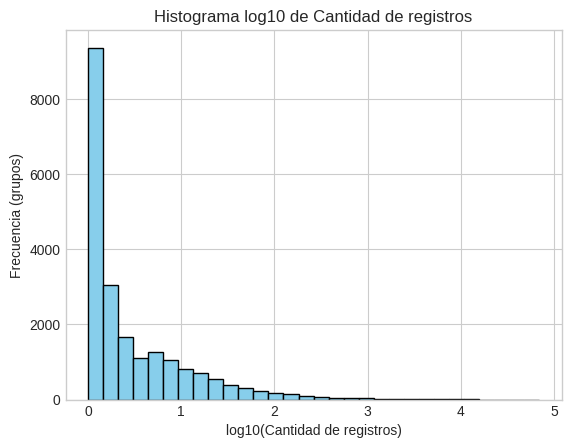

In [8]:
x_pos = x[x > 0]
plt.hist(np.log10(x_pos), bins=30, color='skyblue', edgecolor='black')
plt.title("Histograma log10 de Cantidad de registros")
plt.xlabel("log10(Cantidad de registros)")
plt.ylabel("Frecuencia (grupos)")
plt.show()

La gran mayoría de grupos (más de 300 000) tienen pocos afiliados, entre 1 y 10 personas (log10 ≈ 0).

A medida que el tamaño del grupo crece, la frecuencia disminuye rápidamente: hay menos grupos con 100, 1000 o más afiliados.

La cola derecha larga indica que existen algunos grupos muy grandes (pocos, pero con miles o decenas de miles de afiliados).

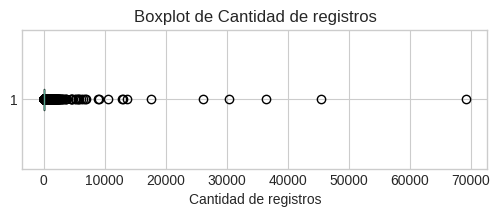

In [9]:
    plt.figure(figsize=(6,1.8))
    plt.boxplot(x.dropna(), vert=False)
    plt.title(f"Boxplot de {col_cant_reg}")
    plt.xlabel(col_cant_reg)
    plt.show()


Frecuencias de Género


,Afiliados,%
Género,,
FEMENINO,492567,64.34
MASCULINO,273060,35.66


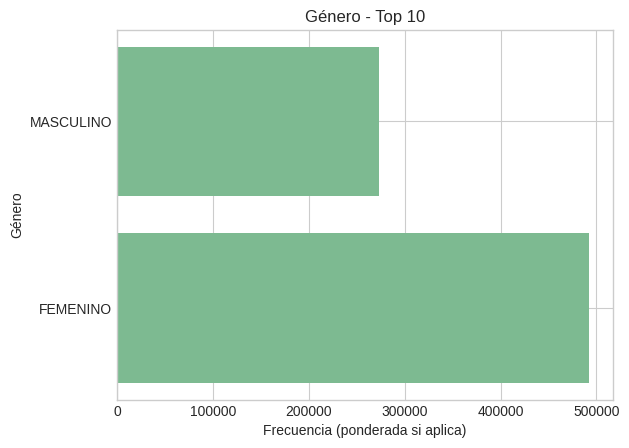


Frecuencias de Grupo etario


,Afiliados,%
Grupo etario,,
19 A 45,304284,39.74
45 A 50,77674,10.15
55 A 60,63809,8.33
5 A 15,62022,8.10
> 75,58990,7.70
70 A 75,41783,5.46
15 A 19,32890,4.30
50 A 55,32092,4.19
65 A 70,31174,4.07


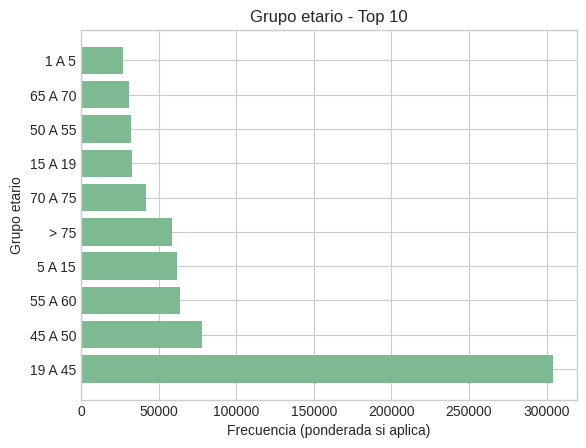


Frecuencias de Código de la entidad


,Afiliados,%
Código de la entidad,,
EPS010,282277,36.87
EPS037,151631,19.80
EPS005,109668,14.32
EPS002,89700,11.72
EPS008,43017,5.62
EPS017,24832,3.24
EPS041,14810,1.93
EPS018,8408,1.10
ESSC24,7192,0.94


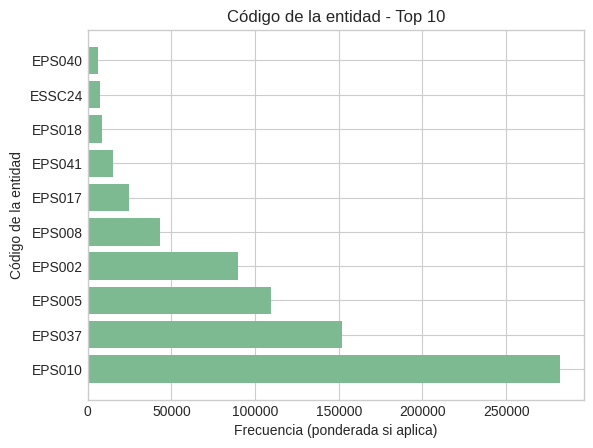


Frecuencias de Nombre de la entidad


,Afiliados,%
Nombre de la entidad,,
EPS SURAMERICANA S.A.,282277,36.87
NUEVA EPS S.A.,151631,19.80
ENTIDAD PROMOTORA DE SALUD SANITAS S.A.S.,109668,14.32
SALUD TOTAL ENTIDAD PROMOTORA DE SALUD DEL REGIMEN CONTRIBUTIVO Y DEL REGIMEN SUBSIDIADO S.A.,89700,11.72
CAJA DE COMPENSACIÓN FAMILIAR COMPENSAR,43017,5.62
EPS FAMISANAR S.A.S.,24832,3.24
NUEVA EPS S.A. -CM,14810,1.93
ENTIDAD PROMOTORA DE SALUD SERVICIO OCCIDENTAL DE SALUD S.A. S.O.S.,8408,1.10
COOSALUD EPS S.A. -CM,7192,0.94


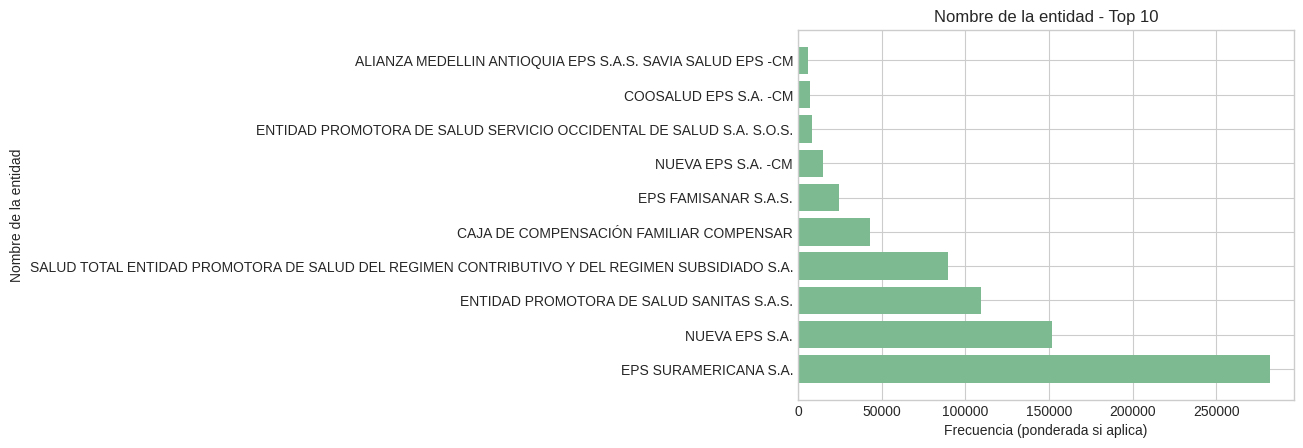


Frecuencias de Régimen


,Afiliados,%
Régimen,,
CONTRIBUTIVO,765627,100.0


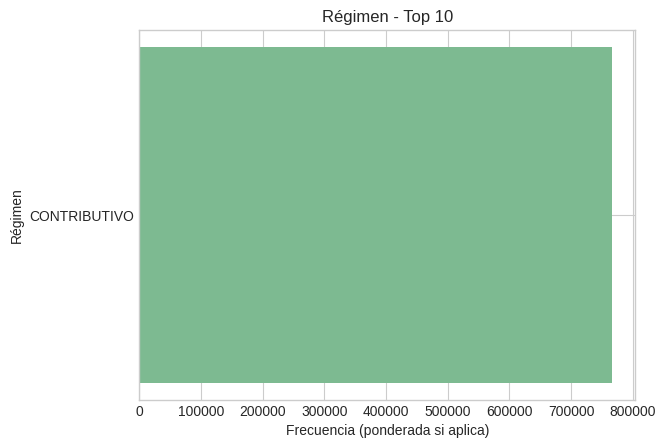


Frecuencias de Tipo de afiliado


,Afiliados,%
Tipo de afiliado,,
COTIZANTE,521122,68.06
BENEFICIARIO,241399,31.53
ADICIONAL,3106,0.41


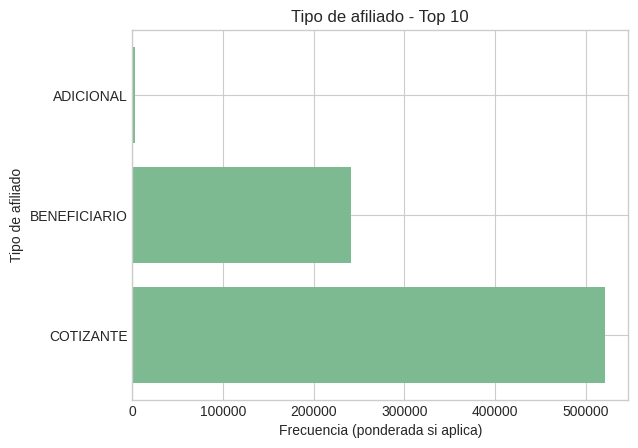


Frecuencias de Estado del afiliado


,Afiliados,%
Estado del afiliado,,
ACTIVO,759211,99.16
PROTECCIÓN LABORAL C,6416,0.84


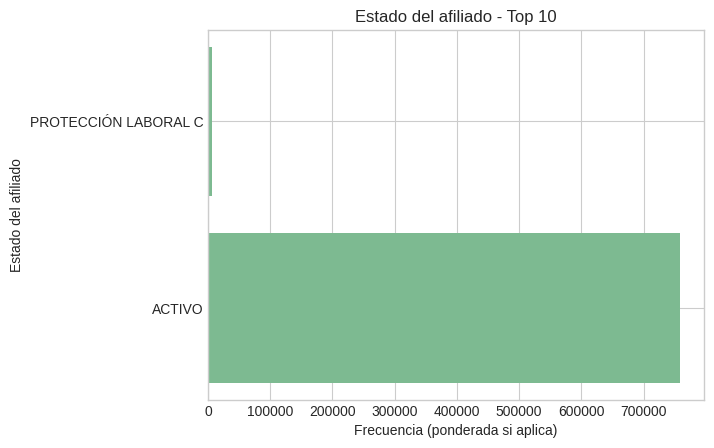


Frecuencias de Condición del beneficiario


,Afiliados,%
Condición del beneficiario,,
NO APLICA,761632,99.48
ESTUDIANTE,2561,0.33
DISCAPACIDAD,1434,0.19


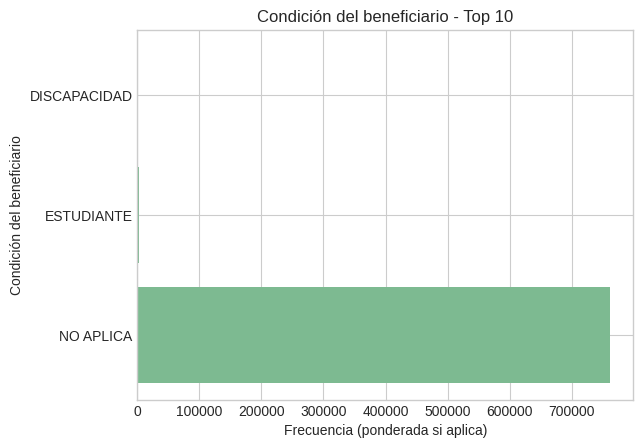


Frecuencias de Zona de Afiliación


,Afiliados,%
Zona de Afiliación,,
URBANA,678662,88.64
URBANA-CABECERA MUNICIPAL,46005,6.01
RURAL,31790,4.15
RURAL - DISPERSAL,7318,0.96
URBANA - CENTRO POBLADO,1373,0.18
RURAL - RESTO RURAL,479,0.06


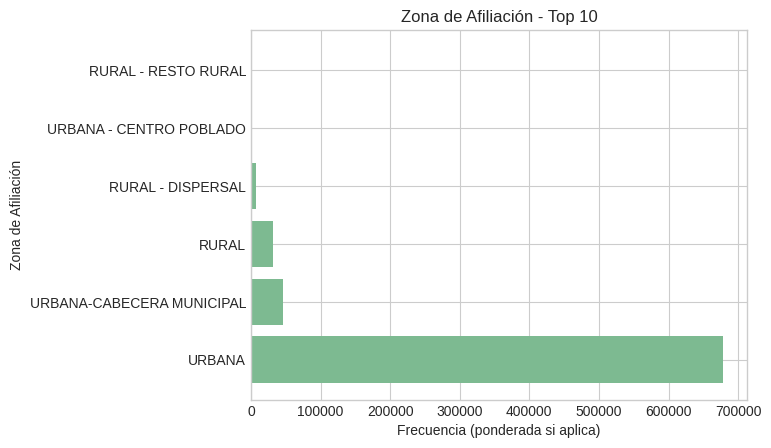


Frecuencias de Departamento


,Afiliados,%
Departamento,,
ANTIOQUIA,196502,25.67
VALLE,132219,17.27
ATLANTICO,73784,9.64
BOGOTA D.C.,69407,9.07
CUNDINAMARCA,44948,5.87
META,32887,4.30
BOLIVAR,30341,3.96
SANTANDER,27914,3.65
MAGDALENA,19050,2.49


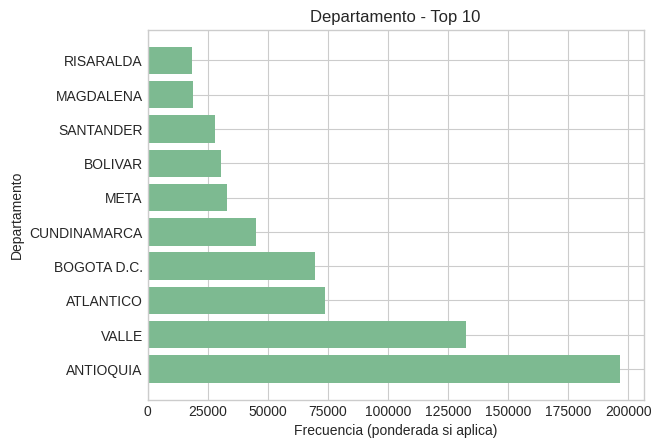


Frecuencias de Municipio


,Afiliados,%
Municipio,,
MEDELLIN,111530,14.57
SANTIAGO DE CALI,97541,12.74
BOGOTA D.C.,69407,9.07
BARRANQUILLA,61027,7.97
BELLO,31392,4.10
VILLAVICENCIO,27194,3.55
CARTAGENA,25549,3.34
ITAGUI,15742,2.06
SANTA MARTA,14677,1.92


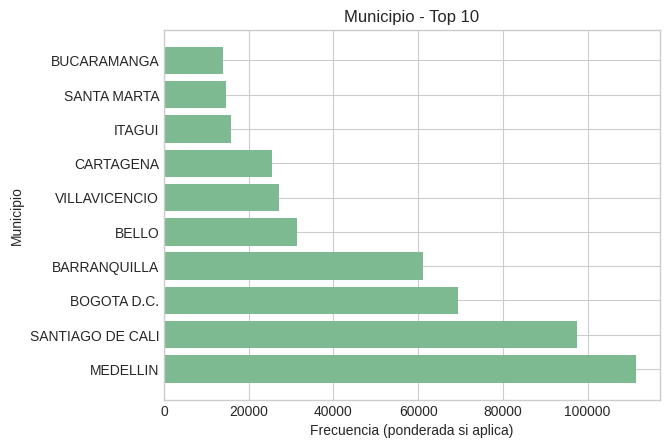


Frecuencias de Nivel del Sisbén


,Afiliados,%
Nivel del Sisbén,,
0,651744,85.13
1,46635,6.09
N,36937,4.82
2,30311,3.96


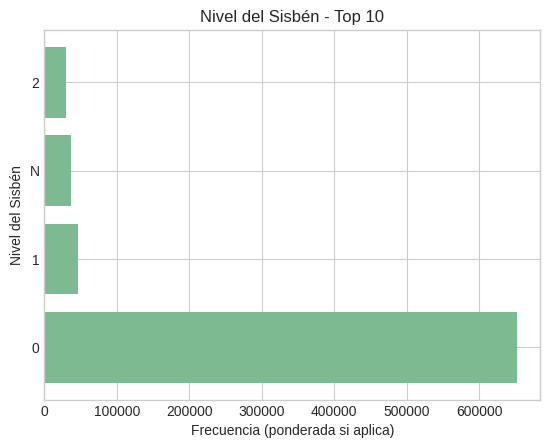


Frecuencias de Grupo poblacional del afiliado


,Afiliados,%
Grupo poblacional del afiliado,,
POBLACIÓN CON SISBEN,76946,67.57
VÍCTIMAS DEL CONFLICTO ARMADO INTERNO,32619,28.64
COMUNIDADES INDÍGENAS,3717,3.26
NIÑOS-NIÑAS-ADOLESCENTES Y JÓVENES EN PROCESO ADMINISTRATIVO PARA EL RESTABLECIMIENTO DE SUS DERECHOS,171,0.15
LOS VOLUNTARIOS ACREDITADOS Y ACTIVOS DE LA DEFENSA CIVIL COLOMBIANA CRUZ ROJA COLOMBIANA Y CUERPOS DE BOMBEROS,91,0.08
PERSONAS EN PRISIÓN DOMICILIARIA A CARGO DEL INPEC.,88,0.08
POBLACIÓN DESMOVILIZADA Y/O MIEMBROS DEL GRUPO ARMADO ILEGAL QUE CELEBREN ACUERDOS DE PAZ CON EL GOBIERNO NACIONAL,51,0.04
ADULTO MAYOR EN CENTROS DE PROTECCIÓN,31,0.03
RECIÉN NACIDO Y MENOR DE EDAD DE PADRES NO AFILIADOS,28,0.02


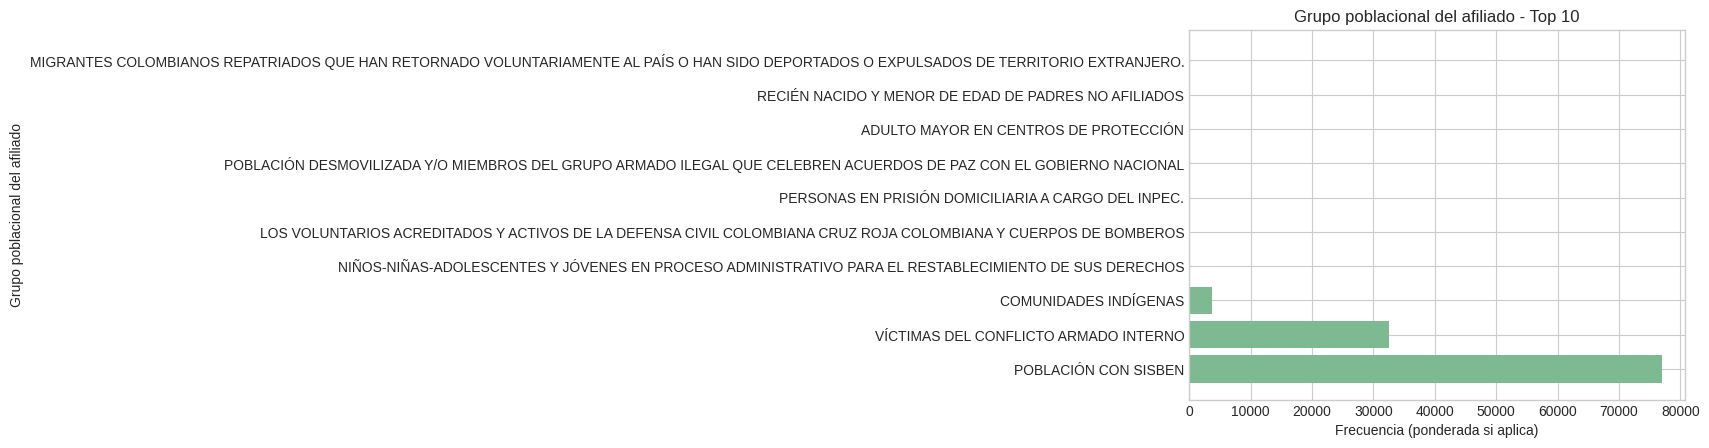

In [10]:
# === Frecuencias de variables categóricas === #
TOP_N = 10  # cantidad de categorías que quiero ver en el gráfico

for col in cat_cols:
    print(f"\nFrecuencias de {col}")

    if col_cant_reg in df.columns:
        # Ponderar por cantidad de afiliados
        tabla = df.groupby(col)[col_cant_reg].sum().sort_values(ascending=False)
        total = tabla.sum()
        tabla = pd.DataFrame({
            "Afiliados": tabla,
            "%": round(tabla / total * 100, 2)
        })
    else:
        # Conteo simple
        tabla = df[col].value_counts(dropna=False).to_frame("Frecuencia")
        tabla["%"] = round(tabla["Frecuencia"] / len(df) * 100, 2)

    display(tabla.head(15))  # muestra las primeras filas

    # gráfico
    top = tabla.head(TOP_N)
    plt.barh(top.index.astype(str), top.iloc[:, 0])
    plt.title(f"{col} - Top {TOP_N}")
    plt.xlabel("Frecuencia (ponderada si aplica)")
    plt.ylabel(col)
    plt.show()


In [14]:
def weighted_freq(df, col, weight_col):
    """Calculates weighted frequencies for a categorical column."""
    if weight_col not in df.columns:
        print(f"Warning: Weight column '{weight_col}' not found. Calculating simple frequencies.")
        tabla = df[col].value_counts(dropna=False).to_frame("Frecuencia")
        tabla["%"] = round(tabla["Frecuencia"] / len(df) * 100, 2)
    else:
        tabla = df.groupby(col)[weight_col].sum().sort_values(ascending=False)
        total = tabla.sum()
        tabla = pd.DataFrame({
            "Afiliados": tabla,
            "%": round(tabla / total * 100, 2)
        })
    return tabla

In [15]:
# ============================================
# 8) Resumen ejecutivo
# ============================================
n_rows, n_cols = df.shape
resume = {
    "Filas": n_rows,
    "Columnas": n_cols,
    "Numéricas": len(num_cols),
    "Categóricas": len(cat_cols),
    "Temporales": len(date_cols),
}
print("\n=== RESUMEN EJECUTIVO ===")
display(pd.DataFrame(resume, index=["Resumen"]))

if col_cant_reg and col_regimen:
    top_reg = weighted_freq(df, col_regimen, col_cant_reg).head(3)
    print("\nTop 3 RÉGIMEN (ponderado):")
    display(top_reg)

if col_cant_reg and col_tipo_af:
    top_tipo = weighted_freq(df, col_tipo_af, col_cant_reg).head(3)
    print("\nTop 3 TIPO DE AFILIADO (ponderado):")
    display(top_tipo)

if col_cant_reg and col_zona:
    top_zona = weighted_freq(df, col_zona, col_cant_reg).head(3)
    print("\nTop 3 ZONA (ponderado):")
    display(top_zona)

if col_cant_reg and col_depto:
    top_dep = weighted_freq(df, col_depto, col_cant_reg).head(3)
    print("\nTop 3 DEPARTAMENTO (ponderado):")
    display(top_dep)


=== RESUMEN EJECUTIVO ===


,Filas,Columnas,Numéricas,Categóricas,Temporales
Resumen,21278,15,1,13,1



Top 3 RÉGIMEN (ponderado):


,Afiliados,%
Régimen,,
CONTRIBUTIVO,765627,100.0



Top 3 TIPO DE AFILIADO (ponderado):


,Afiliados,%
Tipo de afiliado,,
COTIZANTE,521122,68.06
BENEFICIARIO,241399,31.53
ADICIONAL,3106,0.41



Top 3 ZONA (ponderado):


,Afiliados,%
Zona de Afiliación,,
URBANA,678662,88.64
URBANA-CABECERA MUNICIPAL,46005,6.01
RURAL,31790,4.15



Top 3 DEPARTAMENTO (ponderado):


,Afiliados,%
Departamento,,
ANTIOQUIA,196502,25.67
VALLE,132219,17.27
ATLANTICO,73784,9.64
